In [50]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow
from time import time

pd.options.display.float_format = '{:.0f}'.format

In [25]:
times={}
def time_calc(function,string):
    def wrapper():
        start=time()
        function()
        times[string]=time()-start
        return time()-start
    return wrapper

## READING CSV DIFFERENCE

In [26]:
start=time()
df=pl.read_csv("data/movie_data.csv")
end=time()
times["read_time_pl"]=end-start

In [27]:
start=time()
df_pd=pd.read_csv("data/movie_data.csv")
times["read_time_pd"]=time()-start

## FILTERING DIFFERENCE

In [4]:
start=time()
df.filter(pl.col("Runtime")>140).shape
times["filter_time_pl"]=time()-start

(900708, 6)

In [28]:
start=time()
df_pd[df_pd['Runtime']>140].shape
times["filter_time_pd"]=time()-start

In [29]:
start=time()
df.filter(pl.col("Genre").is_in(["Documentary","Thriller"])).shape
times["filter_time_pl2"]=time()-start


In [30]:
# df_pd[df_pd['Genre'].isin(["Documentary","Thriller"])]
start=time()
df_pd.query('Genre in ["Documentary","Thriller"]').shape
times["filter_time_pd2"]=time()-start

## Computation


In [31]:
start=time()
df.select([pl.col("Genre").unique()])
times["computation_pl"]=time()-start

In [32]:
start=time()
df_pd['Genre'].unique()
times["computation_pd"]=time()-start

## DESCRIBE

In [33]:
start=time()
df.describe()
times["describe_func_pl"]=time()-start

In [34]:
start=time()
df_pd.describe()
times["describe_func_pd"]=time()-start

## CREATION

In [35]:
probs = [x for x in range(1,10_000_000)]
percentiles = [x for x in range(1,10_000_000)]

In [36]:
start=time()
pl.DataFrame(dict(probs=probs, percentiles=percentiles)).shape
times["creation_time_pl"]=time()-start

In [37]:

start=time()
pd.DataFrame(dict(probs=probs, percentiles=percentiles)).shape
times["creation_time_pd"]=time()-start

In [38]:
start=time()
df.to_pandas()
times["pl_to_pandas"]=time()-start

In [44]:
start=time()
df.group_by('Genre').agg(pl.count().alias("in Number"))
times["aggregation_time_pd"]=time()-start

Genre,in Number
str,u32
"""Romance""",1250210
"""Horror""",1248788
"""Mystery""",1251190
"""Documentary""",1250765
"""Thriller""",1249671
"""Comedy""",1249931
"""Drama""",1250581
"""Action""",1248863


In [46]:
start=time()
df_pd.groupby('Genre').agg('count')
times["aggregation_time_pd"]=time()-start

# Result

### compared runtimes of polars and pandas dataframes

-- polars is faster and more easy to use in comparison to pandas

-- pandas had difficulties working with big data frames



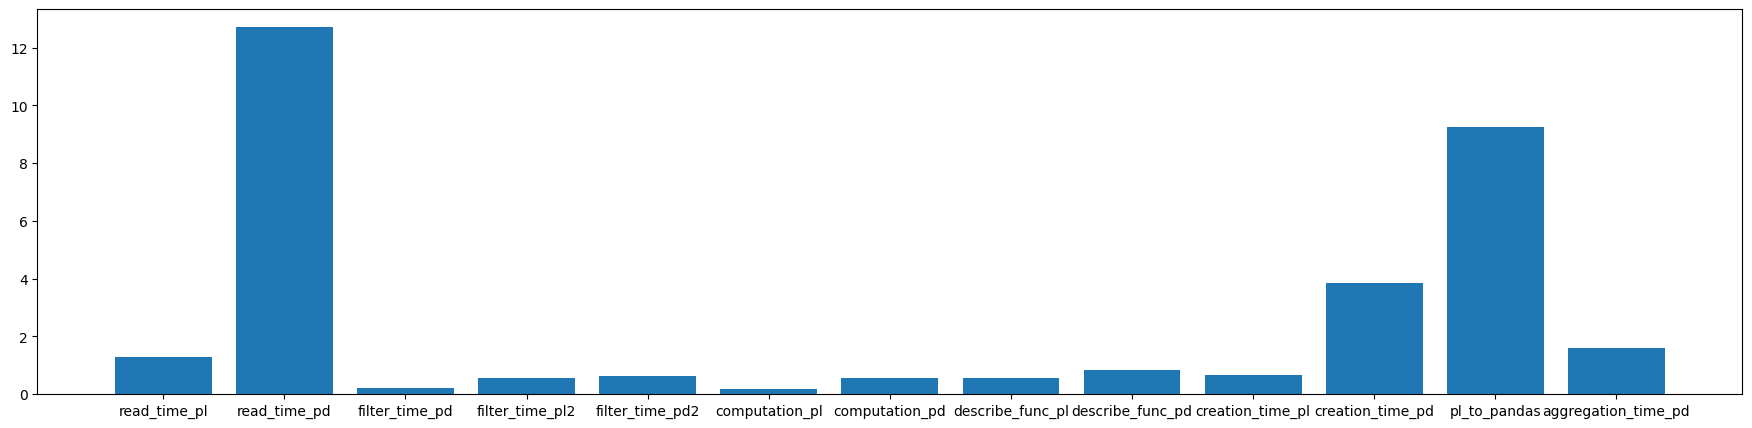

In [91]:
x = np.array(list(times.keys()))
y = np.array(list(times.values()))

plt.figure(figsize=(22,5))
plt.bar(x,y)
plt.show()